Student Details

Name:Michel Danjou

ID: 18263461

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Task 4
  * Perform classification on dataset_1 using an **SVM with linear kernel**
  * Experiment with the C-parameter to find the widest margin solution with a **hard margin** and a **soft margin**. 

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| No plots provided or plots do not provide the correct information. | Plot for either soft- or hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. | Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. Numerical data with explanation to support the conclusions drawn from the graphs.|


  * This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. 
  * You can use the **C-parameter as a form of regularization**; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

 

## Preparation
Reference: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [2]:
import pandas as pd

df = pd.read_csv("./dataset_1.csv")
df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [3]:
df.shape

(10001, 4)

In [4]:
df.head()

,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


In [5]:
df.tail()

,Unnamed: 0,0,1,2
9996,9996,0.628792,-0.562407,1.0
9997,9997,0.595028,0.646407,1.0
9998,9998,0.246373,0.240260,1.0
9999,9999,-0.338258,0.581075,0.0
10000,10000,-0.950000,-1.400000,1.0


In [6]:
df['2'].value_counts()

1.0    6683
0.0    3318
Name: 2, dtype: int64

#### Observations
  * It appears that the column `Unamed: 0` is just and index that could be removed.
  * The target appears to be column `2` which is binary in nature.
  * The target is **inbalanced** with twice more `1s` than `0s`.
  
We know have enough information to define our features and target.

In [7]:
X = df.drop(["Unnamed: 0", "2"], axis=1)
y = df["2"]

In [8]:
X.head()

,0,1
0,-0.331982,-0.926029
1,-0.819310,-0.242368
2,0.922427,0.499088
3,-0.570793,0.562286
4,0.375817,-0.941165


In [9]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: 2, dtype: float64

## SVM with linear kernel
Resources: 
  * https://scikit-learn.org/stable/modules/svm.html
  * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [10]:
X_np = X.values
y_np = y.values

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.20, shuffle=True, stratify=y)

# linear kernel
#clf = svm.SVC(kernel='linear', C=0.001)
clf = svm.SVC(kernel='linear', C=1)
clf.kernel


clf.fit(X_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.score(X_test, y_test)

1.0

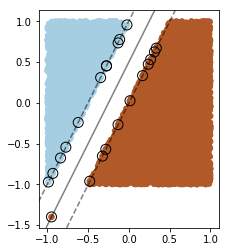

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')



### Using gridsearch

In [14]:
def make_svc_grid_search(nfolds):
    #probas=[True]    
    #Cs = [0.001, 0.01, 0.1, 1, 10]
    #gammas = [0.001, 0.01, 0.1, 1, 2]
    #kernels=['linear', 'poly', 'rbf']
    #degrees =[2,3,4]
    #class_weight =[None, {0: 1 , 1: 3}] 
    
    probas=[True]    
    Cs = [0.0001, 0.001, 0.01, 0.1]
    gammas = [0.001]
    kernels=['linear']
    degrees =[3]
    class_weight =[None] 

    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels, 'degree': degrees, 'probability' : probas, 'class_weight' : class_weight }
    svm_classifier = svm.SVC()
    
    return GridSearchCV(svm_classifier, param_grid, cv=nfolds)

    
def run_gridsearch(grid_search, X, y):
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    
    print("best params:", grid_search.best_params_)
    print("best score :", grid_search.best_score_ )
    return grid_search


In [15]:
print("Starting gridsearch...:")
clf = run_gridsearch(make_svc_grid_search(10), X_train, y_train)

Starting gridsearch...:
best params: {'C': 0.001, 'class_weight': None, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'probability': True}
best score : 0.999875


In [16]:
def plot_svm(X_train, y_train, clf):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()



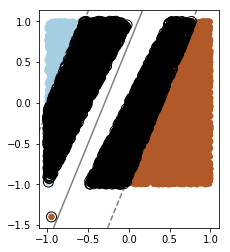

In [17]:
plot_svm(X_train, y_train, clf)

# Task 5

Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable **kernels and hyper-parameters**.

#### Rubric


| Beginning [0-8]       | Developing [9-12]           | Accomplished [13-16]  |Exemplary [17-20] |
| ------------- |:-------------:| -----:|-------------|
| Exploration with sub-optimal kernel / hyper parameter choices for all data sets. | Suitable kernels and hyper parameters proposed for one data set. | Suitable kernels and hyper parameters proposed for two data sets. Proper use of train and test data and plots of the SVM hyperplane. | Suitable kernels and hyper parameters  proposed for all datasets. Proper use of train and test data and plots of the SVM hyperplane. Evidence of a structured approach to the selection of hyper-parameters. |


  * This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some **higher dimensional space as determined by the kernel** you choose. 
  * In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. 
  * Take some time to **explore various kernels and values of the hyper-parameters** to get a feel for how they affect performance and then **use a structured approach** to arrive at your final conclusions. 
  * Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 

For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

 

In [18]:
df2 = pd.read_csv("./dataset_2.csv")
df2.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.000081,-0.000563,0.332800
std,2886.89568,0.574913,0.274366,0.471239
min,0.00000,-0.999780,-0.951513,0.000000
25%,2499.75000,-0.506704,-0.182047,0.000000
50%,4999.50000,0.001152,-0.002540,0.000000
75%,7499.25000,0.494439,0.180595,1.000000
max,9999.00000,0.999979,0.956530,1.000000


In [19]:
df3 = pd.read_csv("./dataset_3.csv")
df3.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.00000
mean,4999.50000,-0.004890,-0.002304,0.88240
std,2886.89568,0.612958,0.616565,0.32215
min,0.00000,-0.999962,-0.999991,0.00000
25%,2499.75000,-0.571095,-0.585002,1.00000
50%,4999.50000,-0.007848,-0.007517,1.00000
75%,7499.25000,0.561483,0.585625,1.00000
max,9999.00000,0.999805,0.999790,1.00000


In [20]:
X2 = df2.drop(["Unnamed: 0", "2"], axis=1)
y2 = df2["2"]

X3 = df3.drop(["Unnamed: 0", "2"], axis=1)
y3 = df3["2"]

In [21]:
X2_np = X2.values
y2_np = y2.values

X3_np = X3.values
y3_np = y3.values

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_np, y2_np, test_size=0.20, shuffle=True, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_np, y3_np, test_size=0.20, shuffle=True, stratify=y3)

clf2 = run_gridsearch(make_svc_grid_search(10), X2_train, y2_train)
clf3 = run_gridsearch(make_svc_grid_search(10), X3_train, y3_train)

In [ ]:
plot_svm(X2_train, y2_train, clf2)
plot_svm(X3_train, y3_train, clf3)

# Code graveyard

Sample code to plot SVM margin, 'gutters' and support vectors


In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
ax.set_aspect(aspect=1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

